# Clustering high-dimensional datasets
Low-dimensional data can still potentially be clustered into a smaller number of groups using theory-derived thresholds. For higher-dimensional data, this would be tedious and lead to a very high number of groups (based on all possible combinations of sub-groups established by the thresholds for the individual dimensions).

Here, we will review how statistical methods can be used to cluster high-dimensional data. 

**Test dataset**  
Let us consider a test dataset with the following variables:
- Climate zone
- Area under annual crops (ha)
- Grazing area (ha)
- Managed forest area (ha)
- Total livestock heads (#)
- People working on farm (#, full-time equivalent of household & hired workers)
- Annual variable input costs (AUD)
- Total farm debt (AUD)
- Number of crop types cultivated simultaneously (#, main season)
- Number of livestock types kept simultaneously (#)
- Share of household income from agriculture (fraction)
- Distance to major urban centre (km)
- Frequency of free-of-charge agricultural extension services per year (#)

In [1]:
# Import software packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from sklearn.preprocessing import StandardScaler
#import scipy
from scipy.cluster.hierarchy import (dendrogram, cut_tree)
from ISLP import load_data
from ISLP.cluster import compute_linkage

In [2]:
# Load the farm dataset
farmData_df = pd.read_csv('farmData_highDimensional.csv')
farmData_df

,climateZone,croplandArea,grazingArea,forestArea,livestockHeads,workingAdults,varCost,debt,cropTypes,livestockTypes,agIncomeShare,marketDist,extensionFreq
0,1,0,600,800,150,2,20000,0,0,1,0.3,500,1
1,1,100,400,600,200,2,20000,0,2,1,0.2,500,0
2,1,150,200,0,200,2,20000,1000000,4,2,0.6,80,2
3,1,150,0,200,0,2,20000,150000,3,0,0.7,40,1
4,1,600,0,200,0,6,100000,1000000,4,0,0.3,100,1
5,1,600,200,400,500,6,100000,1000000,5,3,0.7,400,1
6,2,100,50,200,150,6,20000,1000000,1,2,0.7,200,4
7,2,100,150,150,200,6,20000,0,2,1,1.0,200,1
8,2,150,0,200,0,6,20000,150000,1,0,0.2,15,2
9,2,150,0,0,0,6,20000,500000,4,0,0.5,0,1


### Student exercise: standardisation
In order to ensure a higher comparability across the various units of the variables in the dataset, please **standardise the dataset**.

In [3]:
# Standardise the dataset (student exercise: enter code in this cell)


(Unhide the cell below to view the solution: -> click on the three dots.)

In [4]:
# standardising the farm dataset
scaler = StandardScaler()
farmData_np_std = scaler.fit_transform(farmData_df)

# reformat numpy-array to pandas-dataframe
farmData_df_std = pd.DataFrame(farmData_np_std, columns = farmData_df.columns.to_list())
farmData_df_std

,climateZone,croplandArea,grazingArea,forestArea,livestockHeads,workingAdults,varCost,debt,cropTypes,livestockTypes,agIncomeShare,marketDist,extensionFreq
0,-1.0,-1.012579,1.502506,1.068985,-0.262613,-1.414214,-0.707107,-1.087664,-1.472854,0.000000,-1.028992,1.326579,-0.247436
1,-1.0,-0.562544,0.701170,0.589440,0.000000,-1.414214,-0.707107,-1.087664,-0.332580,0.000000,-1.371989,1.326579,-1.237179
2,-1.0,-0.337526,-0.100167,-0.849194,0.000000,-1.414214,-0.707107,1.307193,0.807694,1.095445,0.000000,-0.684236,0.742307
3,-1.0,-0.337526,-0.901504,-0.369649,-1.050451,-1.414214,-0.707107,-0.728436,0.237557,-1.095445,0.342997,-0.875742,-0.247436
4,-1.0,1.687632,-0.901504,-0.369649,-1.050451,0.707107,1.414214,1.307193,0.807694,-1.095445,-1.028992,-0.588482,-0.247436
5,-1.0,1.687632,-0.100167,0.109896,1.575677,0.707107,1.414214,1.307193,1.377832,2.190890,0.342997,0.847814,-0.247436
6,1.0,-0.562544,-0.701170,-0.369649,-0.262613,0.707107,-0.707107,1.307193,-0.902717,1.095445,0.342997,-0.109717,2.721794
7,1.0,-0.562544,-0.300501,-0.489535,0.000000,0.707107,-0.707107,-1.087664,-0.332580,0.000000,1.371989,-0.109717,-0.247436
8,1.0,-0.337526,-0.901504,-0.369649,-1.050451,0.707107,-0.707107,-0.728436,-0.902717,-1.095445,-1.371989,-0.995433,0.742307
9,1.0,-0.337526,-0.901504,-0.849194,-1.050451,0.707107,-0.707107,0.109764,0.807694,-1.095445,-0.342997,-1.067248,-0.247436


### Student exercise: k-means clustering
Cluster the standardised dataset into 2, 3, and 4 groups.

In [5]:
# k-means clustering into 2,3, and 4 groups (student exercise: enter code in this cell)


(Unhide the cell below to view the solution: -> click on the three dots.)

In [6]:
# k-means clustering: 2 clusters
kmeans_cl2_std = KMeans(n_clusters=2,
                init='k-means++',
                n_init=20,
                random_state=2).fit(farmData_df_std)

# k-means clustering: 3 clusters
kmeans_cl3_std = KMeans(n_clusters=3,
                init='k-means++',
                n_init=20,
                random_state=2).fit(farmData_df_std)

# k-means clustering: 4 clusters
kmeans_cl4_std = KMeans(n_clusters=4,
                init='k-means++',
                n_init=20,
                random_state=2).fit(farmData_df_std)

# store classification results to dataframe
farmData_df_classified = pd.DataFrame(data=farmData_df)
farmData_df_classified['class_2_std'] = list( kmeans_cl2_std.labels_ )
farmData_df_classified['class_3_std'] = list( kmeans_cl3_std.labels_ )
farmData_df_classified['class_4_std'] = list( kmeans_cl4_std.labels_ )

Let us inspect the results of the classification by:
- Inspecting the table of all three classification results.
- Inspecting a figure of the classification results when using 3 clusters. For the visualisation, we only consider the dimensions "croplandArea", "grazingArea", & "forestArea".

In [7]:
farmData_df_classified

,climateZone,croplandArea,grazingArea,forestArea,livestockHeads,workingAdults,varCost,debt,cropTypes,livestockTypes,agIncomeShare,marketDist,extensionFreq,class_2_std,class_3_std,class_4_std
0,1,0,600,800,150,2,20000,0,0,1,0.3,500,1,0,2,1
1,1,100,400,600,200,2,20000,0,2,1,0.2,500,0,0,2,1
2,1,150,200,0,200,2,20000,1000000,4,2,0.6,80,2,1,1,0
3,1,150,0,200,0,2,20000,150000,3,0,0.7,40,1,1,1,0
4,1,600,0,200,0,6,100000,1000000,4,0,0.3,100,1,1,0,2
5,1,600,200,400,500,6,100000,1000000,5,3,0.7,400,1,1,0,2
6,2,100,50,200,150,6,20000,1000000,1,2,0.7,200,4,1,1,0
7,2,100,150,150,200,6,20000,0,2,1,1.0,200,1,1,1,0
8,2,150,0,200,0,6,20000,150000,1,0,0.2,15,2,1,1,0
9,2,150,0,0,0,6,20000,500000,4,0,0.5,0,1,1,1,0


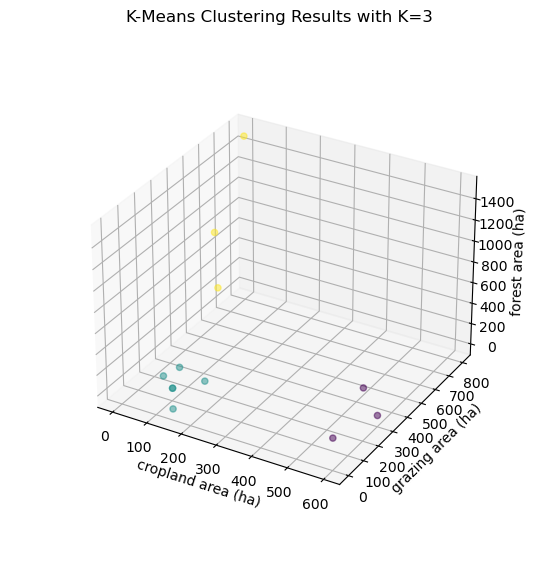

In [8]:
# 3D plot of clustered farm-data: 3 clusters
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(
    farmData_df_classified['croplandArea'], 
    farmData_df_classified['grazingArea'], 
    farmData_df_classified['forestArea'], 
    marker='o', c=farmData_df_classified['class_3_std'], alpha=0.5)

ax.set_xlabel('cropland area (ha)')
ax.set_ylabel('grazing area (ha)')
ax.set_zlabel('forest area (ha)')
ax.set_title("K-Means Clustering Results with K=3")

ax.set_box_aspect(aspect=None, zoom=0.8)

### Student question
Interpret the above results:
- Is the three-cluster classification doing a good or bad job of separating farms based on the three considered dimensions: cropland area, grazing area, and forest area?
- When plotting the datapoints across these three dimensions (cropland area, grazing area, and forest area), what can we derive from the fact that the three clusters (identified by the colour of the points) are largely located in distinct regions of the three-dimensional figure? Asked differently: Why do we not observe a pattern where the colours are irregularly mixed across the chosen three-dimensional space?
- Which of the three calculated solutions would you prefer and why: Clustering into two, three, or four groups?

# Hierarchical clustering
Many statistical techniques exist that permit clustering. In contrast to the previously discussed approach, hierarchical clustering does not require specifying the number of clusters in advance. Instead, the result of hierarchical clustering provides us with a tree-like categorisation of the observations that allows us to contemplate which number of clusters we evaluate as most suitable.  
For conducting hierarchical clustering, we will make use of the function **AgglomerativeClustering()** from the **scikit-learn** software-package. (For convenience, we abbreviate *AgglomerativeClustering* to *HClust*.)

As the starting point, we again use the simple trial dataset that consists of only two dimensions and 50 observations.

In [9]:
# Generating trial dataset
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

X_df = pd.DataFrame({'dimension1': X[:, 0], 'dimension2': X[:, 1]})
X_df

,dimension1,dimension2
0,4.764052,-3.599843
1,3.978738,-1.759107
2,4.867558,-4.977278
3,3.950088,-4.151357
4,2.896781,-3.589401
5,3.144044,-2.545726
6,3.761038,-3.878325
7,3.443863,-3.666326
8,4.494079,-4.205158
9,3.313068,-4.854096


### Euclidean distance  
Clustering methods group observations that are similar and separate observations that are different. To use data science methods for clustering, we first need to define a mathematical distance measure. Here, we use the **Euclidean distance** as measure of dissimilarity. The Euclidean distance between two points can be interpreted as the **length of the closest line that connects the two points** (in our example: in the two-dimensional space this is closely related to the Pythagorean theorem that you may remember from school). A less graphical interpretation of the Euclidean distance is: **the sum of the absolut difference between two observations across all considered variables/dimensions**. In mathematical terms we can define the Euclidean distance *d* between two observations *p* & *q* in the n-dimensional space as:

$$d(p,q) = \sqrt{ \sum_{i=1}^{n} (q_i - p_i)^2 }$$


### Distance matrix  
As part of hierarchical clustering, we choose here to manually compute the Euclidean distance between any two points. Once we calculated the Euclidean distance, we store the values within a *distance matrix*. In layman's terms, a **matrix** is a set of numbers arranged in rows and columns, constituting a two-dimensional table with index numbers as row and column headings.  

A **distance matrix** is a matrix that identifies the distances of pairwise elements identified by the row- and column-position. For example, consider the hypothetical distance matrix M below:

$$M = \begin{bmatrix}0 & 1.5 & 3.1\\
1.5 & 0 & 12.2\\
3.1 & 12.2 & 0
\end{bmatrix}$$

E.g., the value at position (1,2) is referred to as $m_{1,2}$ and denotes the value in the first row and second column (the row is referenced first, then the column). In the above example, $m_{1,2}$ has the value 1.5 and denotes that the distance between element 1 and element 2 is 1.5. Instead, the value $m_{1,1}$ is indicated as 0, which indicates that there is - as expectable - no distance between element 1 and itself.  

Let us now compute the distance matrix for our trial dataset.

In [10]:
# compute distance matrix
X_distMatrix = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
    X_distMatrix[i] = np.sqrt(np.sum((X - x_)**2, 1));

pd.DataFrame(X_distMatrix)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,2.001257,1.381319,0.983212,1.867300,1.932767,1.040957,1.321862,0.662791,1.917943,...,7.443888,4.768081,6.397963,4.954798,7.463739,7.067865,6.457499,6.162217,7.183465,6.125172
1,2.001257,0.000000,3.338656,2.392422,2.126172,1.146946,2.130371,1.980802,2.499749,3.165766,...,5.790926,3.520137,4.422840,3.214589,5.780438,5.300078,4.658401,4.381912,5.321069,4.416662
2,1.381319,3.338656,0.000000,1.234462,2.410428,2.980427,1.559514,1.935330,0.857703,1.559363,...,8.422926,5.587253,7.658990,6.051585,8.464354,8.137396,7.560294,7.256515,8.326535,7.170093
3,0.983212,2.392422,1.234462,0.000000,1.193839,1.796596,0.332095,0.701085,0.546645,0.948492,...,7.189591,4.356609,6.529152,4.842771,7.232516,6.915828,6.348032,6.042708,7.125379,5.945557
4,1.867300,2.126172,2.410428,1.193839,0.000000,1.072565,0.911272,0.552464,1.711875,1.331445,...,6.054868,3.182105,5.663247,3.817861,6.107921,5.834689,5.298754,4.990902,6.101161,4.858331
5,1.932767,1.146946,2.980427,1.796596,1.072565,0.000000,1.468503,1.160015,2.139231,2.314549,...,5.517959,2.862303,4.740210,3.075594,5.543085,5.175122,4.585389,4.283526,5.346197,4.218070
6,1.040957,2.130371,1.559514,0.332095,0.911272,1.468503,0.000000,0.381501,0.802602,1.073688,...,6.863499,4.042876,6.205409,4.510679,6.904961,6.584720,6.016045,5.710786,6.793353,5.614976
7,1.321862,1.980802,1.935330,0.701085,0.552464,1.160015,0.381501,0.000000,1.180379,1.194950,...,6.488596,3.661547,5.895986,4.157595,6.532036,6.220916,5.659165,5.353025,6.443169,5.249129
8,0.662791,2.499749,0.857703,0.546645,1.711875,2.139231,0.802602,1.180379,0.000000,1.347556,...,7.622201,4.832313,6.801307,5.214759,7.657078,7.310403,6.724518,6.422287,7.482974,6.348067
9,1.917943,3.165766,1.559363,0.948492,1.331445,2.314549,1.073688,1.194950,1.347556,0.000000,...,7.292020,4.372169,6.992299,5.138391,7.357229,7.122838,6.605846,6.297866,7.415936,6.146383


Let us now conduct the actual **hierarchical clustering operation**. As part of the *AgglomerativeClustering* function we will specify the following arguments:
- **n_clusters**: The number of clusters in which the data shall be grouped (as we do not want to predetermine this a priori, we use "None").
- **metric**: The kind of distance / dissimilarity measure that shall be used (here: our distance-matrix is used as an externally provided distance measure; alternatively, we could have specified 'euclidean').
- **linkage**: The linkage criterion that shall be used (‘complete’ -> maximum distance, ‘single’ -> minimum distance, ‘average’ -> average distance, ‘ward’ -> minimises the variance of the clusters being merged).
- **distance_threshold**: The linkage distance threshold at or above which clusters will not be merged (here: we want to merge until all observations fall into a single cluster).

(n_clusters & distance_threshold can not both be 'None' at the same time.)

In [11]:
# conduct hierarchical clustering (with single linkage)
HClust = AgglomerativeClustering
hc_comp = HClust(n_clusters=None,
                     metric='precomputed',
                     linkage='complete',
                     distance_threshold=0,
                     )

hc_comp.fit(X_distMatrix)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='precomputed', n_clusters=None)

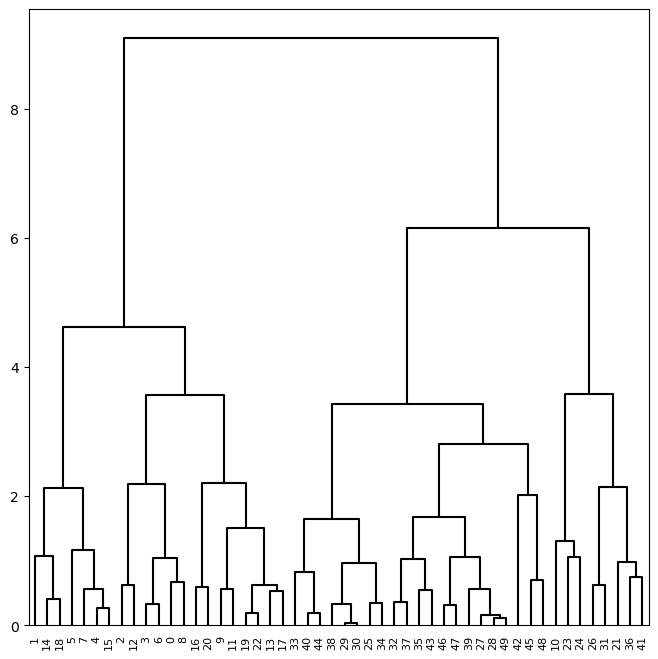

In [12]:
# visualizing the dendrogram
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);

### Dendrogram interpretation
A dendrogram visualises the results of the hierarchical clustering calculations. At the bottom, all 50 observations are considered as individual 50 groups. At the top, all 50 observations are considered in a single group. Everything in between is a compromise between these two extreme cases.

Moving from the bottom to the top, the 50 observations are increasingly clustered into a smaller number of groups based on their similarity. E.g., consider the two cutoff points at the y-values 3 & 4 indicated in red below. At a cutoff-value of y=3, the dataset is divided into 7 groups - identified by the dendrogram "tree-branches" that are intersected. At a cutoff-value of y=4, the dataset is instead divided into 4 groups only. In that way, a dendrogram permits us to visually evaluate and compare in how many and in which groups we could cluster the data.

When interpreting a dendrogram it is important to note that:
- The height of where any two observations fuse into one "tree-branch" is a measure of the similarity of the two observations. The smaller the height of the fusion point, the more similar are the points
- Instead, it is incorrect to draw conclusions about the similarity of two observations based on their horizontal proximity (which is a common misunderstanding)

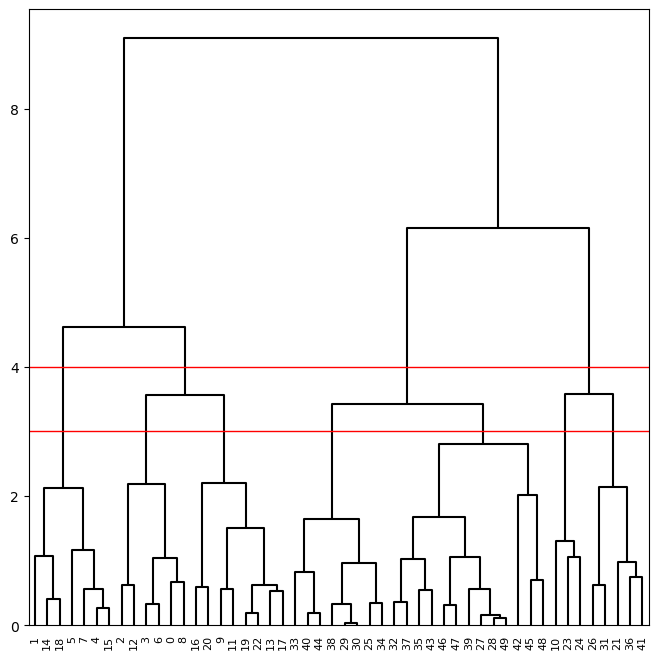

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);

ax.axhline(4, c='r', linewidth=1);
ax.axhline(3, c='r', linewidth=1);


## Hierarchical clustering of the high-dimensional farm dataset

### Student exercise
Now that you have learned about the basic logic and usage of hierarchical clustering, conduct hierarchical clustering of the multi-dimensional farm dataset that we introduced further above in this notebook. Please ensure that you again use the standardised version of the dataset, not the nominal version.  

This time, you can spare yourself the extra work of calculating the distance matrix manually. This can also be done by the *AgglomerativeClustering* function. For this purpose, specify that distance measure that we are using shall be 'euclidean' instead of 'precomputed'.

In [14]:
# conduct hierarchical clustering of the high-dimensional farm dataset (student exercise: enter code in this cell)


(Unhide the cell below to view the solution: -> click on the three dots.)

In [15]:
hc_comp_farmData = HClust(n_clusters=None,
                     metric='euclidean',
                     linkage='complete',
                     distance_threshold=0,
                     )

hc_comp_farmData.fit(farmData_df_std)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='euclidean', n_clusters=None)

In the dendrogram below, I added three possible cut-offs that group the dataset respectively into four (y=5.73), three (y=6), or two (y=7) clusters.

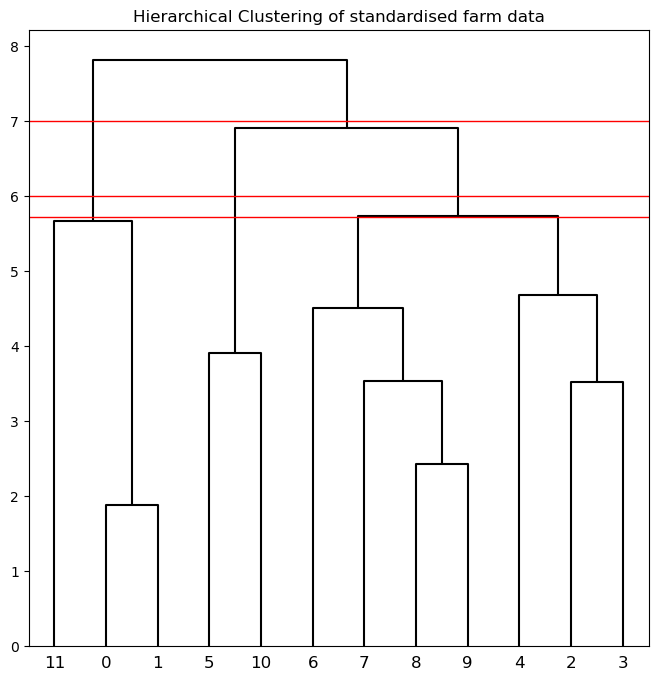

In [16]:
# visualizing the dendrogram
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp_farmData)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);

ax.set_title("Hierarchical Clustering of standardised farm data");

ax.axhline(7, c='r', linewidth=1);
ax.axhline(6, c='r', linewidth=1);
ax.axhline(5.73, c='r', linewidth=1);

Let us now inspect how the clustering based on the hierarchical clustering method compares to the k-means clustering we did earlier.

In [17]:
# rename columns of k-means clustering results
farmData_df_classified.rename(columns={
    "class_2_std": "class2_kMeans", 
    "class_3_std": "class3_kMeans",
    "class_4_std": "class4_kMeans",
}, inplace=True)

# add results from hierarchical clustering to dataset
farmData_df_classified['class2_HC'] = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
farmData_df_classified['class3_HC'] = [0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0]
farmData_df_classified['class4_HC'] = [0, 0, 4, 4, 4, 1, 3, 3, 3, 3, 1, 0]

In [18]:
farmData_df_classified

,climateZone,croplandArea,grazingArea,forestArea,livestockHeads,workingAdults,varCost,debt,cropTypes,livestockTypes,agIncomeShare,marketDist,extensionFreq,class2_kMeans,class3_kMeans,class4_kMeans,class2_HC,class3_HC,class4_HC
0,1,0,600,800,150,2,20000,0,0,1,0.3,500,1,0,2,1,0,0,0
1,1,100,400,600,200,2,20000,0,2,1,0.2,500,0,0,2,1,0,0,0
2,1,150,200,0,200,2,20000,1000000,4,2,0.6,80,2,1,1,0,1,2,4
3,1,150,0,200,0,2,20000,150000,3,0,0.7,40,1,1,1,0,1,2,4
4,1,600,0,200,0,6,100000,1000000,4,0,0.3,100,1,1,0,2,1,2,4
5,1,600,200,400,500,6,100000,1000000,5,3,0.7,400,1,1,0,2,1,1,1
6,2,100,50,200,150,6,20000,1000000,1,2,0.7,200,4,1,1,0,1,2,3
7,2,100,150,150,200,6,20000,0,2,1,1.0,200,1,1,1,0,1,2,3
8,2,150,0,200,0,6,20000,150000,1,0,0.2,15,2,1,1,0,1,2,3
9,2,150,0,0,0,6,20000,500000,4,0,0.5,0,1,1,1,0,1,2,3


### Student question
The above table provides the clustering results for the two discussed methods (i) k-means clustering (column-suffix "kMeans") and (ii) hierarchical clustering (column-suffix "HC"). Review and discuss:

- For each of the three number of clusters (two, three, or four clusters) do k-means and hierarchical clustering generate the same or different results?

Now only consider the case of grouping the dataset into three clusters:
- Compare in detail how the results from k-means clustering and hierarchical clustering differ. How many of the 12 observations are categorised differently by the two methods?
- When having a look at the base data in the other columns of the table: Can you easily identify why k-means clustering considered the observation with index 4 within a different group than hierarchical clustering?


<details>
    <summary>Click <font color="red"><b>here</b></font> to reveal the answer!</summary>
    
- When grouping the dataset into two clusters, both methods provide the identical solution. For the case of three or four groups the methods provide different solutions.
- When grouping the dataset into three clusters, the two methods largely agree. When disregarding that the ordering is different across both methods (which has no meaning), only the observation with index 4 is categorised different across the two methods. 
  

| Index | class3_kMeans | class3_kMeans   (reordered) | class3_HC |
|-------|:-------------:|:---------------------------:|:---------:|
| 0     | 2             | 0                           | 0         |
| 1     | 2             | 0                           | 0         |
| 2     | 1             | 2                           | 2         |
| 3     | 1             | 2                           | 2         |
| 4     | 0             | 1                           | 2         |
| 5     | 0             | 1                           | 1         |
| 6     | 1             | 2                           | 2         |
| 7     | 1             | 2                           | 2         |
| 8     | 1             | 2                           | 2         |
| 9     | 1             | 2                           | 2         |
| 10    | 0             | 1                           | 1         |
| 11    | 2             | 0                           | 0         |
    
- No, there is no easy answer that can be spotted from the table due to the multi-dimensionality. It can be tempting to make some guesses: E.g., k-means clustering will have likely given a bigger weight to cropland area than hierarchical clustering (where obs. 4 is similar to obs. 5). Instead hierarchical clustering has given larger weight to grazing area and forest area (where obs. 4 is identical to obs.3). However, when trying to identify these similarities in an ad-hoc manner in a multi-dimensional dataset it is likely that we overlook important dimensions. Ad-hoc human reasoning is not at its best when considering more than three dimensions.
    
</details>